In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# Dataset 1 description

Source - https://www.kaggle.com/datasets/neuromusic/avocado-prices

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

__Some relevant columns in the dataset:__

- `Date` - The date of the observation
- `AveragePrice` - the average price of a single avocado
- `type` - conventional or organic
- `year` - the year
- `Region` - the city or region of the observation
- `Total Volume` - Total number of avocados sold
- `4046` - Total number of avocados with PLU 4046 sold
- `4225` - Total number of avocados with PLU 4225 sold
- `4770` - Total number of avocados with PLU 4770 sold

In [539]:
# weekly data from 2015 to 2018 
df1 = pd.read_csv('avocado.csv')
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


# Dataset 2 description

Source - https://www.fao.org/worldfoodsituation/foodpricesindex/en/

The FAO `Food Price Index` (FFPI) is a measure of the monthly change in international prices of a basket of food commodities. It consists of the average of five commodity group price indices weighted by the average export shares of each of the groups over 2014-2016.

In [540]:
# Monthly data from 1990 to March 2023
df2 = pd.read_csv('Food_price_indices.csv', header=2)
df2 = df2.loc[:,:'Sugar'].dropna()
df2

,Date,Food Price Index,Meat,Dairy,Cereals,Oils,Sugar
1,1990-01,64.1,73.4,53.5,64.1,44.59,87.9
2,1990-02,64.5,76.0,52.2,62.2,44.50,90.7
3,1990-03,63.8,77.8,41.4,61.3,45.75,95.1
4,1990-04,65.8,80.4,48.4,62.8,44.02,94.3
5,1990-05,64.4,81.0,39.2,62.0,45.50,90.4
...,...,...,...,...,...,...,...
395,2022-11,134.7,114.6,137.4,150.1,154.70,114.4
396,2022-12,131.8,112.4,138.2,147.3,144.60,117.2
397,2023-01,130.3,111.1,135.0,147.5,140.40,116.8
398,2023-02,129.7,112.1,131.3,146.7,135.90,125.2


# The region and the domain category

`Region` - Avocado USA and Food Price Index around the world

`Domain category` - Food

#  Research question

Is there any correlation between avocado Hass prices in the USA and Food Price Index in 2015-2018?

__Clearing datasets__

In [541]:
df1_us = df1.loc[df1['region'] == 'TotalUS'].loc[:,['Date', 'AveragePrice', 'type']]

In [542]:
df1_us.set_index('Date', inplace=True)

In [543]:
def price(raw):
    if raw['type'] == 'conventional':
        raw['Conventional Avocado Price'] = raw['AveragePrice']
        raw['Organic Avocado Price'] = 0
    elif raw['type'] == 'organic':
        raw['Conventional Avocado Price'] = 0
        raw['Organic Avocado Price'] = raw['AveragePrice']
    return raw

df1_us = df1_us.apply(price, axis=1)[['Conventional Avocado Price', 'Organic Avocado Price']]

In [544]:
df1_us.index = pd.to_datetime(df1_us.index)

In [545]:
df1_us = df1_us.resample('W').max().resample('MS').mean()

In [546]:
df2['Date'] = pd.to_datetime(df2['Date'])
df2.set_index('Date', inplace=True)

In [547]:
df2 = df2.loc['2015-01':'2018-03'][['Food Price Index']]

__Merging datasets__

In [548]:
df = df1_us.merge(df2, left_index=True, right_index=True)
df

,Conventional Avocado Price,Organic Avocado Price,Food Price Index
Date,,,
2015-01-01,1.0075,1.4575,100.7
2015-02-01,0.9725,1.4825,98.5
2015-03-01,1.0160,1.4960,95.6
2015-04-01,1.0450,1.5500,94.7
2015-05-01,1.0220,1.4920,95.0
2015-06-01,1.0150,1.6625,94.5
2015-07-01,1.0625,1.0000,93.8
2015-08-01,1.0680,1.4260,89.6
2015-09-01,1.0250,1.7750,89.0


__Plotting a correlation matrix__

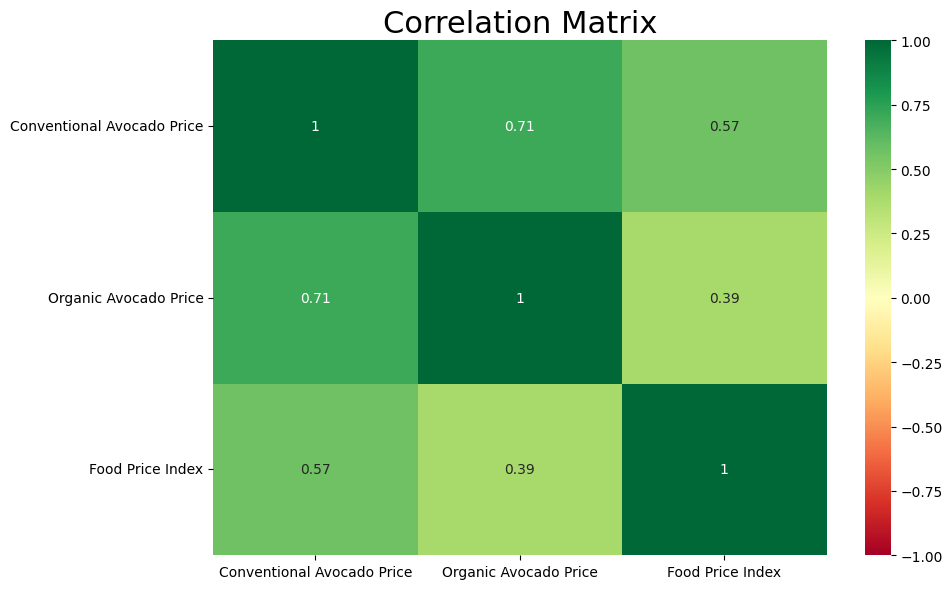

In [551]:
f, ax = plt.subplots(figsize=(10, 6))

#mask = np.triu(df.corr())
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, center=0, cmap ='RdYlGn')
plt.title('Correlation Matrix', size=22)
plt.tight_layout()
plt.xticks(rotation=0)
plt.yticks(rotation=0); 